In [1]:
!pip install flickrapi

     |████████████████████████████████| 54 kB 1.4 MB/s 


In [2]:
import flickrapi
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.transform
import requests
from io import BytesIO
%matplotlib inline

In [3]:
 api_key = u'22e2c933ae0e513d69f3719e473ddecd'
api_secret = u'7d57a46157c1cc40'
flickr = flickrapi.FlickrAPI(api_key, api_secret)

In [4]:
import warnings
import os
dir_name = 'train'
dir_exists = os.path.isdir(dir_name)
if not dir_exists:
    os.mkdir(dir_name)
    print("Making directory %s" % dir_name)
else:
    print("Will store images in directory %s" % dir_name)

dir_name = 'test'
dir_exists = os.path.isdir(dir_name)
if not dir_exists:
    os.mkdir(dir_name)
    print("Making directory %s" % dir_name)
else:
    print("Will store images in directory %s" % dir_name)

dir_folder = os.path.join(os.getcwd(),'train','bicycle')
dir_exists = os.path.isdir(dir_folder)
if not dir_exists:
    os.mkdir(dir_folder)
    print("Making directory %s" % dir_folder)
else:
    print("Will store images in directory %s" % dir_folder)

dir_folder = os.path.join(os.getcwd(),'train','car')
dir_exists = os.path.isdir(dir_folder)
if not dir_exists:
    os.mkdir(dir_folder)
    print("Making directory %s" % dir_folder)
else:
    print("Will store images in directory %s" % dir_folder)

dir_folder = os.path.join(os.getcwd(),'test','bicycle')
dir_exists = os.path.isdir(dir_folder)
if not dir_exists:
    os.mkdir(dir_folder)
    print("Making directory %s" % dir_folder)
else:
    print("Will store images in directory %s" % dir_folder)

dir_folder = os.path.join(os.getcwd(),'test','car')
dir_exists = os.path.isdir(dir_folder)
if not dir_exists:
    os.mkdir(dir_folder)
    print("Making directory %s" % dir_folder)
else:
    print("Will store images in directory %s" % dir_folder)

Making directory train
Making directory test
Making directory /content/train/bicycle
Making directory /content/train/car
Making directory /content/test/bicycle
Making directory /content/test/car


In [5]:
keyword = 'bicycle'
dir_name = 'bicycle'
photos = flickr.walk(text=keyword, tag_mode='all', tags=keyword,extras='url_c',\
                     sort='relevance',per_page=100)

nimage = 1300
i = 0
nrow = 224
ncol = 224
for photo in photos:
    url=photo.get('url_c')
    if not (url is None):
        
        response = requests.get(url)
        file = BytesIO(response.content)
        
        im = skimage.io.imread(file)
        
        im1 = skimage.transform.resize(im,(nrow,ncol),mode='constant')
                
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            im2 = skimage.img_as_ubyte(im1)
    
        if i< 1000:
          local_name = '{0:s}/{1:s}/{2:s}_{3:04d}.jpg'.format('train',dir_name,keyword, i)
        else:
          local_name = '{0:s}/{1:s}/{2:s}_{3:04d}.jpg'.format('test',dir_name,keyword, i)
        skimage.io.imsave(local_name, im2)
        if (i%100) == 1:      
          print(local_name)
        i = i + 1        
    if (i >= nimage):        
        break        

train/bicycle/bicycle_0001.jpg
train/bicycle/bicycle_0101.jpg
train/bicycle/bicycle_0201.jpg
train/bicycle/bicycle_0301.jpg
train/bicycle/bicycle_0401.jpg
train/bicycle/bicycle_0501.jpg
train/bicycle/bicycle_0601.jpg
train/bicycle/bicycle_0701.jpg
train/bicycle/bicycle_0801.jpg
train/bicycle/bicycle_0901.jpg
test/bicycle/bicycle_1001.jpg
test/bicycle/bicycle_1101.jpg
test/bicycle/bicycle_1201.jpg


In [6]:
keyword = 'car'
dir_name = 'car'
photos = flickr.walk(text=keyword, tag_mode='all', tags=keyword,extras='url_c',\
                     sort='relevance',per_page=100)

nimage = 1300
i = 0
nrow = 224
ncol = 224
for photo in photos:
    url=photo.get('url_c')
    if not (url is None):
        
        response = requests.get(url)
        file = BytesIO(response.content)
        
        im = skimage.io.imread(file)
        
        im1 = skimage.transform.resize(im,(nrow,ncol),mode='constant')
                
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            im2 = skimage.img_as_ubyte(im1)
    
        if i< 1000:
          local_name = '{0:s}/{1:s}/{2:s}_{3:04d}.jpg'.format('train',dir_name,keyword, i)
        else:
          local_name = '{0:s}/{1:s}/{2:s}_{3:04d}.jpg'.format('test',dir_name,keyword, i)
        skimage.io.imsave(local_name, im2)
        if (i%100) == 1:      
          print(local_name)
        i = i + 1        
    if (i >= nimage):        
        break        

train/car/car_0001.jpg
train/car/car_0101.jpg
train/car/car_0201.jpg
train/car/car_0301.jpg
train/car/car_0401.jpg
train/car/car_0501.jpg
train/car/car_0601.jpg
train/car/car_0701.jpg
train/car/car_0801.jpg
train/car/car_0901.jpg
test/car/car_1001.jpg
test/car/car_1101.jpg
test/car/car_1201.jpg


In [7]:
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [8]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense


In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import tensorflow.keras.backend as K
K.clear_session()

In [11]:
nrow = 150
ncol = 150

In [12]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image

input_shape = (nrow, ncol,3)
base_model = applications.VGG16(weights = 'imagenet', include_top = False, input_shape = input_shape)

58900480/58889256 [==============================] - 1s 0us/step


In [13]:
model = Sequential()

for layer in base_model.layers:
    model.add(layer)

In [14]:
for layer in model.layers:
    layer.trainable = False

In [15]:
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 37, 37, 256)       2

In [17]:
train_data_dir = './train'
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [18]:
test_data_dir = './test'
batch_size = 32
test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(
                        test_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='binary')

Found 600 images belonging to 2 classes.


In [19]:
def disp_image(im):
    if (len(im.shape) == 2):
        plt.imshow(im, cmap='gray')    
    else: 
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    

    plt.xticks([])
    plt.yticks([])

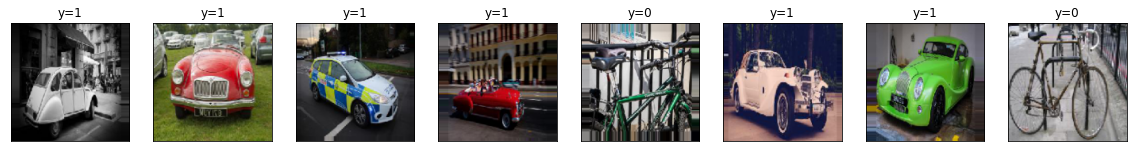

In [20]:
train_generator.reset()
Xtr, ytr = train_generator.next()
nplot = 8
plt.figure(figsize=(20,10))

for i in range(nplot):
  plt.subplot(1,nplot,i+1)
  disp_image(Xtr[i])
  plt.title('y=%d' % ytr[i])

In [21]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.1e-3)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [22]:
steps_per_epoch = train_generator.n // batch_size
validation_steps = test_generator.n // batch_size

(steps_per_epoch, validation_steps)

(62, 18)

In [23]:
nepochs = 5

hist = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=nepochs,
    validation_data=test_generator,
    validation_steps=validation_steps)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
62/62 [==============================] - 564s 9s/step - loss: 0.2589 - accuracy: 0.8953 - val_loss: 0.1244 - val_accuracy: 0.9531
Epoch 2/5
62/62 [==============================] - 562s 9s/step - loss: 0.1092 - accuracy: 0.9624 - val_loss: 0.0986 - val_accuracy: 0.9618
Epoch 3/5
62/62 [==============================] - 560s 9s/step - loss: 0.0822 - accuracy: 0.9705 - val_loss: 0.0972 - val_accuracy: 0.9531
Epoch 4/5
62/62 [==============================] - 560s 9s/step - loss: 0.0751 - accuracy: 0.9731 - val_loss: 0.0711 - val_accuracy: 0.9740
Epoch 5/5
62/62 [==============================] - 559s 9s/step - loss: 0.0602 - accuracy: 0.9787 - val_loss: 0.0743 - val_accuracy: 0.9774


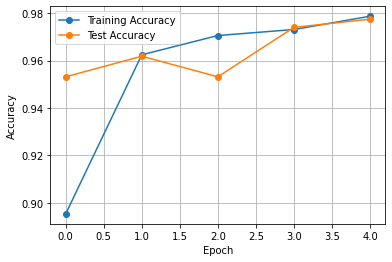

In [26]:
plt.plot(hist.history['accuracy'], 'o-')
plt.plot(hist.history['val_accuracy'], 'o-')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Test Accuracy'])

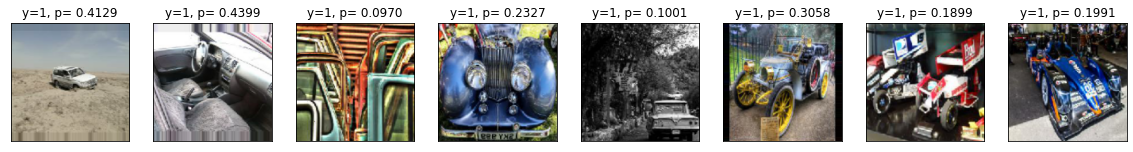

In [27]:
test_generator.reset()
nplot = 8
nfound = 0
Xerr = []
zhat = []
ytrue = []

while (nfound < nplot):
  Xts, yts = test_generator.next()
  z = model.predict(Xts)
  yhat = (z > 0.5).astype(int).ravel()
  I = np.where(yhat != yts)[0]
  
  for i in I:
    Xerr.append(Xts[i])
    ytrue.append(yts[i])
    zhat.append(z[i])
    nfound += 1
    
plt.figure(figsize=(20,10))

for i in range(nplot):
  plt.subplot(1,nplot,i+1)
  disp_image(Xerr[i])
  plt.title('y=%d, p=%7.4f' % (ytrue[i], zhat[i]) )